In [289]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

def F(x,a,b,c,d,e,f):
    return (b*x**3)*(np.cos(-a*x+c*np.pi)-f*x)*(d+e*x)

In [290]:
x =np.array([
1.762616021545484912e+00, 
7.954274558188359379e+00 ,
7.830614589494160782e+00 ,
6.316749546153680228e+00 ,
-9.282208287662934154e+00,
3.835151635177677321e+00 ,
-2.426381159891837669e+00,
3.702189089616130246e-01 ,
3.159029311176260180e+00 ,
-6.122995642341033218e+00,
-4.553671958668321196e+00,
4.372118672023315611e+00 ,
5.660072189180208824e+00 ,
7.006552795499906949e+00 ,
5.504897879887254319e+00 ,
-9.266713871578284412e+00,
-7.666125297342096800e+00,
5.025613989754019073e+00 ,
-5.215635676007810417e+00,
-4.903879721157064608e+00,
7.152510623395251343e+00 ,
8.995580522286054759e+00 ,
1.233737160223158824e+00 ,
-6.424389603000468796e+00,
5.405038662768005153e+00 ,
-1.523792077090107000e-01,
2.625061311270906472e+00 ,
6.789958458274117703e+00 ,
-7.792120741513848259e-01,
-4.119853385389760092e-02,
3.588222351065015303e+00 ,
3.015718282466600897e+00 ,
-4.624095225112919039e+00,
-8.653506661219644513e+00,
5.428902767171255306e+00 ,
-3.803173540070829972e-01,
-3.415871845327065337e+00,
2.128211235030352810e-01 ,
-4.727423426798864625e+00,
-3.789768999074052402e+00])
y = np.array([
-2.559485692520085398e-01,
-5.953745355969532937e+01,
 -5.823798175531754850e+01,
 -1.452170507582623848e+01,
 -3.265690823071358295e+01,
1.232340869022955943e+01,
3.191781015537770827e+00,
 1.618404375392851480e-01,
6.590203356472616569e+00,
 -1.099924868338029782e+01,
2.208038770576017029e+01,
 1.524105487814322757e+01,
3.712914840255366222e+00,
 -3.782673476904893306e+01,
 6.880442262037118617e+00,
-3.372180013245237973e+01,
 -6.862544026386180462e+01,
1.346676486043681287e+01,
 1.559008416203402625e+01,
 2.000424727434241490e+01,
 -4.249069815577094289e+01,
 -4.200062820935982444e+01,
-3.054593486216813925e-01,
 -2.321875875741405082e+01,
 8.653392009956244024e+00,
 -1.529623386714639155e-01,
 2.675406749973325393e+00,
 -3.053838650915460917e+01,
 -1.054334419815528889e+00,
 -3.679741360320712418e-02,
 1.030625438093799495e+01,
5.417878389154622276e+00,
 2.189125315893183554e+01,
-6.485211102315516030e+01,
8.248856715535817230e+00,
 -4.541538203726931400e-01,
 1.421196493331327915e+01,
 1.309179543870419571e-01,
2.141140480788692457e+01,
1.839776325998227691e+01])
maxX = 0
maxY = 0

for j in range(len(x)-1):
    for i in range(len(x)-1):
        if(x[i]>x[i+1]):
            maxX = x[i]
            x[i] = x[i+1]
            x[i+1] = maxX
            maxY = y[i]
            y[i] = y[i+1]
            y[i+1] = maxY

In [291]:
n = 200
x_ap = np.linspace(x[0], x[39], n)

solution = curve_fit(F, x, y)[0] 
a = solution[0]
b = solution[1]
c = solution[2]
d = solution[3]
e = solution[4]
f = solution[5]
print('оптимизированные значения параметров:')
print('a:',a,'b:',b,'c:',c,'d:',d,'e:',e)

оптимизированные значения параметров:
a: 0.5970855019265857 b: 0.04563274696601898 c: 0.4943817224635724 d: 5.690534430381005 e: -0.07093026563682085


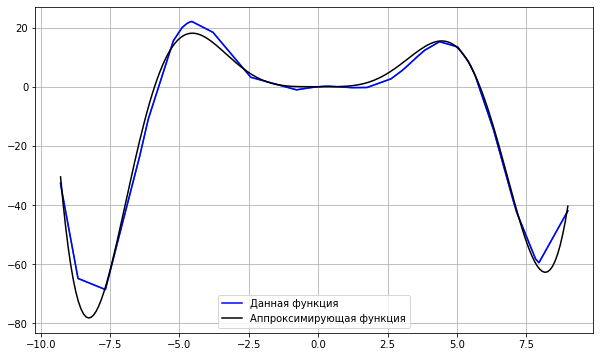

In [292]:
y_ap = F(x_ap,a,b,c,d,e,f)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
axes.plot(x, y)
axes.plot(x, y,'b', label = 'Данная функция')
axes.plot(x_ap, y_ap,'black', label = 'Аппроксимирующая функция')
axes.legend(loc = 'lower center')
axes.grid()
plt.show()      

In [293]:
maxX = 0
maxY = 0
err = 0
dist = 0
for i in range(0,len(y)):
    dist = abs(y[i] - F(x[i],a,b,c,d,e,f))
    if(dist>err):
        err = dist
        maxX = x[i]
        maxY = y[i]
print('Максимально отклонение:',err,'в точке [',format(round(maxX, 3)),';',format(round(maxY, 3)),']')

Максимально отклонение: 7.389531984182867 в точке [ -8.654 ; -64.852 ]


In [294]:
s = 0
pr = 0
err = 0
for i in range(0,len(y)):
    pr = (y[i] - F(x[i], a, b,c,d,e,f))**2
    s += pr
err = math.sqrt(s)/len(y)
print('Среднеквадратическое отклонение:', format(round(err, 3)))


Среднеквадратическое отклонение: 0.37
